['/home/ge25qer/python/Event_viewer/', '/home/ge25qer/python/Dsp', '/home/ge25qer/.conda/envs/pygama/lib/python310.zip', '/home/ge25qer/.conda/envs/pygama/lib/python3.10', '/home/ge25qer/.conda/envs/pygama/lib/python3.10/lib-dynload', '', '/home/ge25qer/.conda/envs/pygama/lib/python3.10/site-packages']


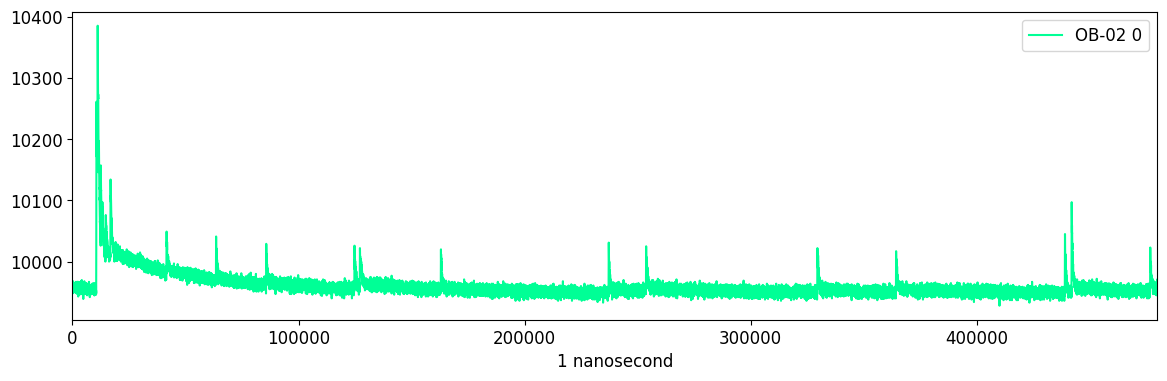

In [1]:
import sys
sys.path.insert(0,"/home/ge25qer/python/Event_viewer/")
import simultaneous_waveviewer
from pygama.lgdo.lh5_store import show
import pygama.dsp.build_dsp as build_dsp
"""
    build_dsp prosseses a LH5 file given via "f_raw" to a "f_dsp" output file.
    it needs a "dsp_config" file which is a dictionary that discribes which and how the prossesors from /pygama/dsp/processors should be used.
    n_max is used to limit the number of waveforms to be processed.
    (complete list of input variables can be found in /pygama/dsp/build_dsp.py)
"""
raw_file = "/mnt/atlas01/projects/legend/data/com/raw/2022-04-13-sipm-test/run007/a/20220417-113433-m6-muon-amajl4-mmaj3-es30000.lh5"
dsp_file = "/mnt/atlas01/users/shofinger/dsp_7/a/113433.lh5"
#already run, commented out to save performance
"""
build_dsp(
        f_raw = "/mnt/atlas01/projects/legend/data/com/raw/2022-04-13-sipm-test/run008/20220425-175756-th228-4p7kbq-8400-athr200,12,2-es4000.lh5",
        f_dsp = "/home/ge25qer/python/full.lh5",
        dsp_config = "/home/ge25qer/python/sipm-dsp-config.json",
        write_mode = "u",
        n_max = 1
    )
"""

#example data used as basis for the following graphs
simultaneous_waveviewer.simul_viewer(lh5_file_in = raw_file,data_dir = "/raw",include_channel = ["OB-02"],)
#show("/home/ge25qer/python/full.lh5")
print(sys.path)

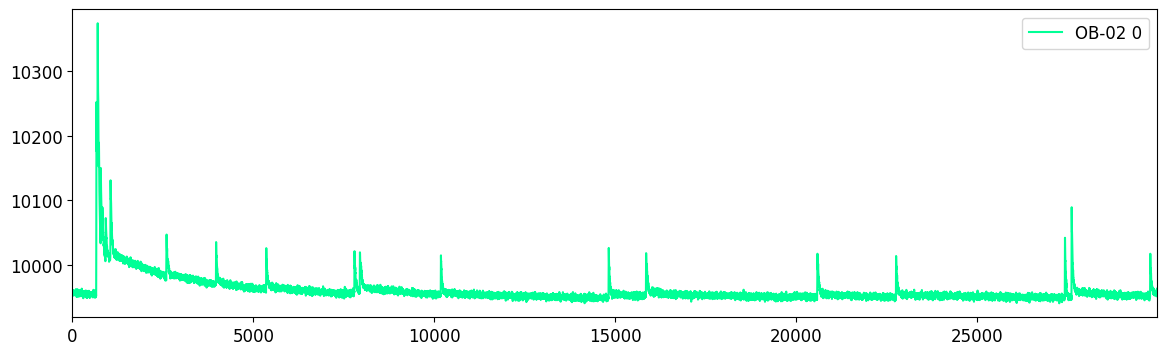

In [2]:
#processors
#gaussian_filter1d:
simultaneous_waveviewer.simul_viewer(lh5_file_in = "/mnt/atlas01/users/shofinger/dsp_7/a/113433.lh5", data_dir = "/dsp",lines = ["wf_gaus"],include_channel = ["OB-02"],)
#smothes the wave
#smothing is done via a gaus function kernal which calculates each new point based on its weighted surrounding points

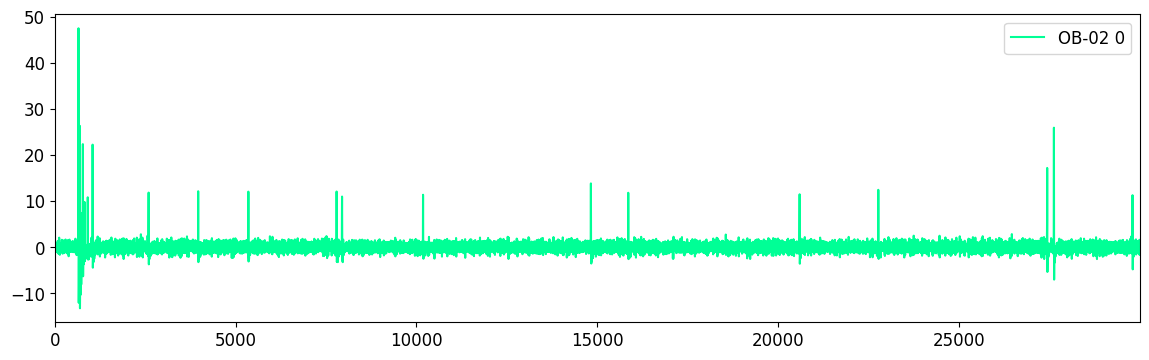

In [3]:
#avg_current:
simultaneous_waveviewer.simul_viewer(lh5_file_in = dsp_file, data_dir = "/dsp",lines = ["curr"],include_channel = ["OB-02"],)
#calculates the derivative for each point based on a the change inside a moving window of defined length

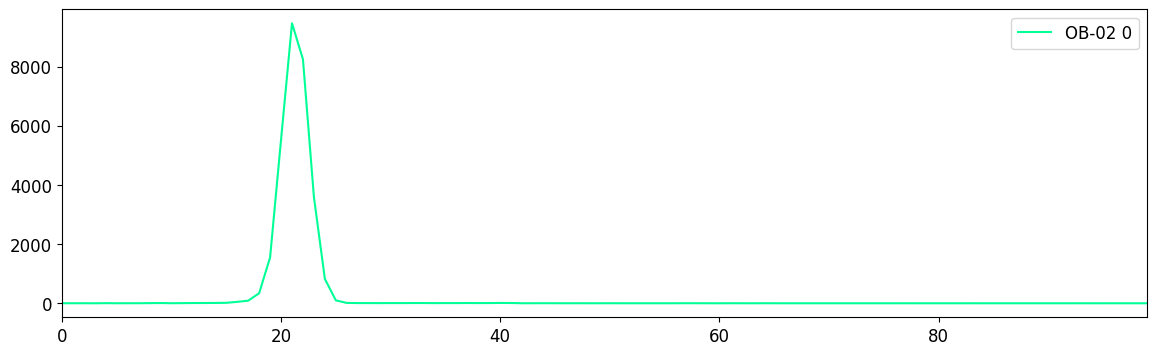

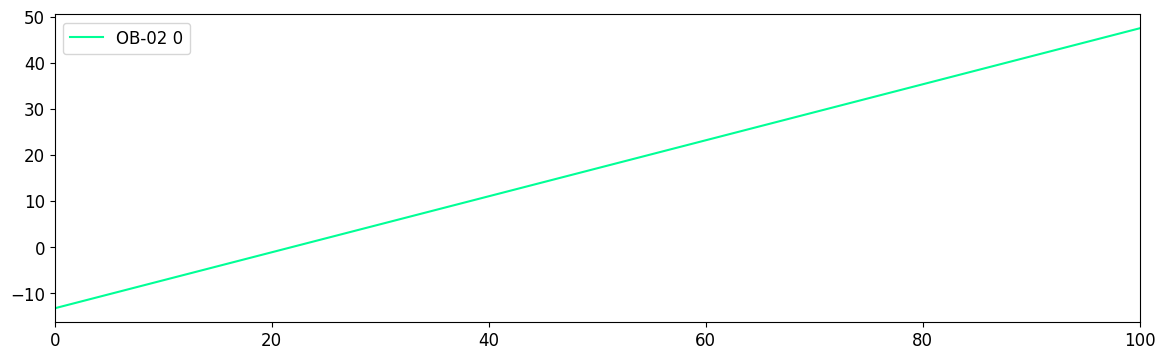

In [4]:
#histogram:
simultaneous_waveviewer.simul_viewer(lh5_file_in = dsp_file, data_dir = "/dsp",lines = ["hist_weights"],include_channel = ["OB-02"],)
simultaneous_waveviewer.simul_viewer(lh5_file_in = dsp_file, data_dir = "/dsp",lines = ["hist_borders"],include_channel = ["OB-02"],)
#hist_borders gives the x values for hist_weights

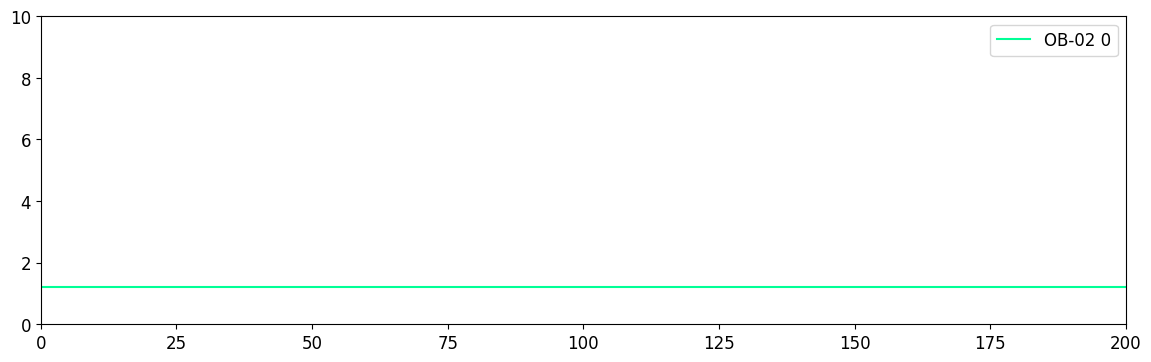

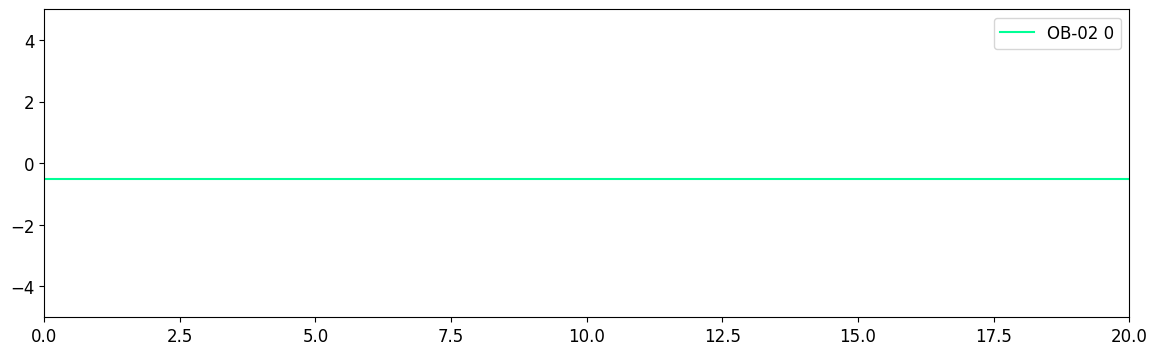

In [5]:
#histogram_stats
simultaneous_waveviewer.simul_viewer(lh5_file_in = dsp_file, data_dir = "/dsp",lines = ["fwhm"],include_channel = ["OB-02"],x_lim=[0,200], y_lim=[0,10])
simultaneous_waveviewer.simul_viewer(lh5_file_in = dsp_file, data_dir = "/dsp",lines = ["max_out"],include_channel = ["OB-02"],x_lim=[0,20], y_lim=[-5,5])
#FWHM full width at half maximum 

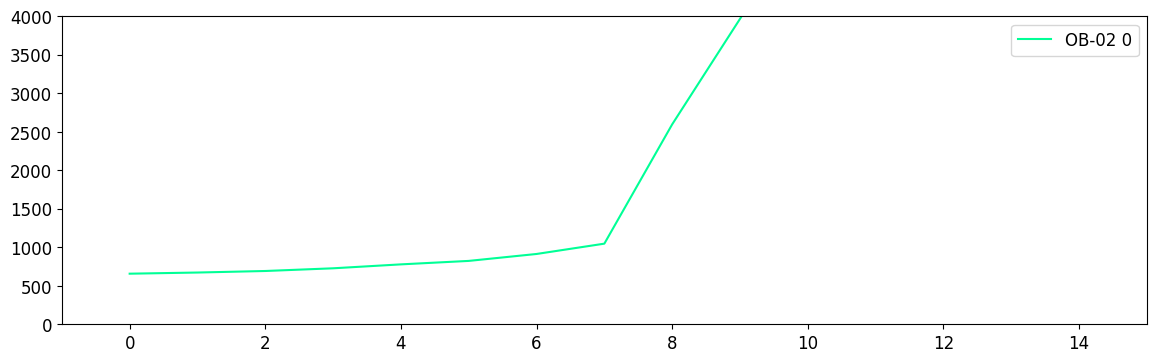

In [6]:
#get_multi_local_extrema
simultaneous_waveviewer.simul_viewer(lh5_file_in = dsp_file, data_dir = "/dsp",lines = ["vt_max_candidate_out"],include_channel = ["OB-02"],x_lim=[-1,15], y_lim=[0,4000])
#candidates for maximum 

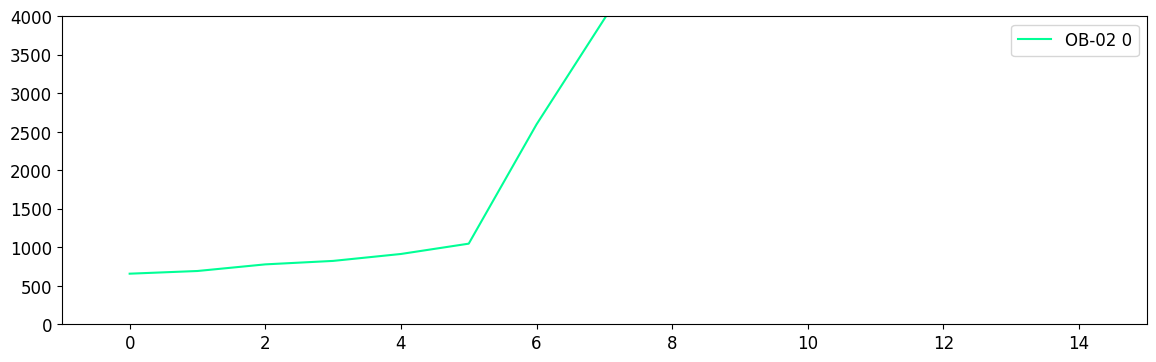

In [7]:
#peak_snr_threshold
simultaneous_waveviewer.simul_viewer(lh5_file_in = dsp_file, data_dir = "/dsp",lines = ["trigger_pos"],include_channel = ["OB-02"],x_lim=[-1,15], y_lim=[0,4000])
#searches for a miminum in the area arround a previus found maximum
#removes maximum from list if no sufficiant minimum is found

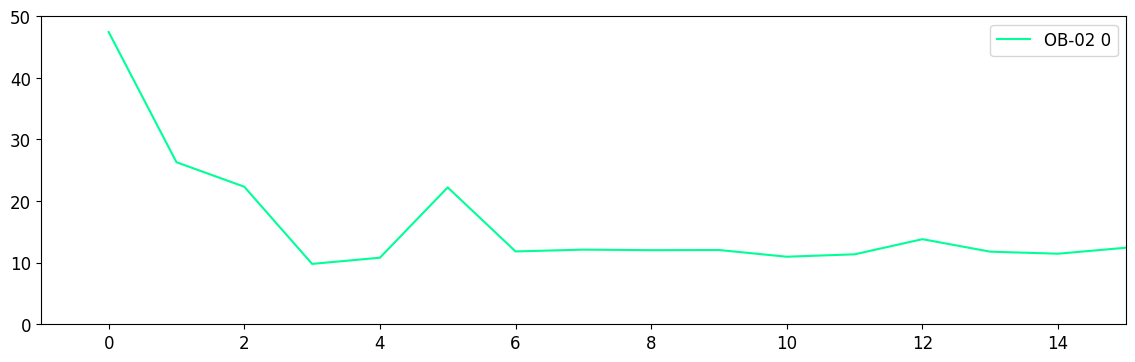

In [8]:
#multi_a_filter
simultaneous_waveviewer.simul_viewer(lh5_file_in = dsp_file, data_dir = "/dsp",lines = ["energies"],include_channel = ["OB-02"],x_lim=[-1,15], y_lim=[0,50])
#finds the amplitude of each previus maximum from the current graph